## Import Libraries

In [1]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Load Data

In [3]:
experiment_answer_types = {}
counter_answer_types = 0
counter_no_answer_types = 0
with open("experiment_answer_types.txt", "r") as infile:
    for line in infile:
        if("\t" in line.rstrip()):
            counter_answer_types += 1
            [query_text,answer_type] = line.rstrip().split("\t")
            experiment_answer_types[query_text] = answer_type.split(":")[0]
        else:
            if not line.rstrip() == "":
                counter_no_answer_types += 1
                experiment_answer_types[line.rstrip()] = ""

In [9]:
import string
table = str.maketrans(dict.fromkeys(string.punctuation)) 

In [16]:
query_lengths = []
with open("experiment_query_texts.txt", "r") as infile:
    for line in infile:
        query_lengths.append(len(line.rstrip().translate(table).split()))
query_lengths_counter = Counter(query_lengths)

In [17]:
query_lengths_counter

Counter({3: 3, 4: 3, 5: 9, 6: 11, 7: 7, 8: 3, 9: 1, 10: 2, 11: 3, 15: 1})

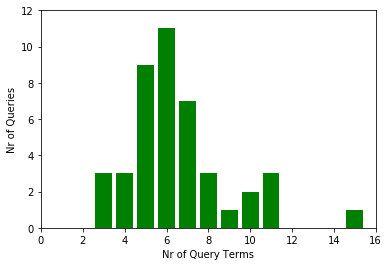

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(list(query_lengths_counter.keys()), query_lengths_counter.values(), color='g')
plt.xlabel("Nr of Query Terms")
plt.ylabel("Nr of Queries")
plt.xlim([0,16])
plt.ylim([0,12])
plt.savefig('images/experiment_queries_query_lengths_distribution.png', bbox_inches='tight')
plt.show()